In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Fighters taken from this website to mine data on: https://www.thesportster.com/mma-fighters-who-suffered-career-ending-injuries-in-the-octagon/

These were fighters that retired from continuing injuries. Data will be mined off of them in order to see why they were injured and how might we prevent further injuries. 

In [2]:
master_dataframe_b = pd.read_csv('cleaned_master_data.csv')
pd.set_option('display.max_columns', None) #so all of the columns can be seen including the age column
display(master_dataframe_b.head())
print("Shape of Master Dataframe:", master_dataframe_b.shape)
master_dataframe_b.info()

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
0,1994-03-11,0,Sean Daugherty,Scott Morris,Open Weight,orthodox,1975-12-04,SUB,20,1,0:20,John McCarthy,No Time Limit,0.0,72.0,18.0,0,0,0,0,0,0,0,4,1,5,0,2,0,0,0,2,0,3,0,1,0,0
1,1994-03-11,1,Scott Morris,Sean Daugherty,Open Weight,orthodox,1900-01-01,SUB,20,1,0:20,John McCarthy,No Time Limit,0.0,70.0,0.0,0,1,0,0,1,1,1,1,2,2,1,1,0,0,0,0,0,0,1,1,0,0
2,1994-03-11,1,Patrick Smith,Ray Wizard,Open Weight,orthodox,1963-08-28,SUB,58,1,0:58,John McCarthy,No Time Limit,0.0,74.0,30.0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0
3,1994-03-11,0,David Levicki,Johnny Rhodes,Open Weight,orthodox,1900-01-01,KO/TKO,733,1,12:13,John McCarthy,No Time Limit,0.0,77.0,0.0,0,0,0,0,0,0,4,5,95,102,4,5,0,0,0,0,1,2,2,2,1,1
4,1994-03-11,0,Thaddeus Luster,Frank Hamaker,Open Weight,orthodox,1900-01-01,SUB,292,1,4:52,John McCarthy,No Time Limit,0.0,75.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Shape of Master Dataframe: (13295, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13295 entries, 0 to 13294
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       13295 non-null  object 
 1   result                     13295 non-null  int64  
 2   fighter                    13295 non-null  object 
 3   opponent                   13295 non-null  object 
 4   division                   13295 non-null  object 
 5   stance                     13295 non-null  object 
 6   dob                        13295 non-null  object 
 7   method                     13295 non-null  object 
 8   total_comp_time            13295 non-null  int64  
 9   round                      13295 non-null  int64  
 10  time                       13295 non-null  object 
 11  referee                    13295 non-null  object 
 12  time_format                13295 non-null  object 
 13  reach  

In [3]:
display(master_dataframe_b[master_dataframe_b['fighter']=='Cain Velasquez'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'Cain Velasquez']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs = [df['date_diff'].mean()]
pd.array(date_diffs)

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
1734,2008-04-19,1,Cain Velasquez,Brad Morris,Heavyweight,orthodox,1982-07-28,KO/TKO,130,1,2:10,Steve Mazzagatti,5-5-5,77.0,73.0,25.0,3,0,0,108,0,0,36,55,62,83,33,52,3,3,0,0,5,10,5,5,26,40
1850,2008-07-19,1,Cain Velasquez,Jake O'Brien,Heavyweight,orthodox,1982-07-28,KO/TKO,122,1,2:02,Mario Yamasaki,5-5-5,77.0,73.0,25.0,0,0,0,113,1,1,24,26,79,83,23,25,1,1,0,0,0,1,1,1,23,24
2092,2009-02-07,1,Cain Velasquez,Denis Stojnic,Heavyweight,orthodox,1982-07-28,KO/TKO,454,2,2:34,Jorge Ortiz,5-5-5,77.0,73.0,26.0,0,0,0,208,1,4,88,140,124,183,47,97,17,19,24,24,30,67,48,61,10,12
2224,2009-06-13,1,Cain Velasquez,Cheick Kongo,Heavyweight,orthodox,1982-07-28,U-DEC,900,3,5:00,Dan Miragliotta,5-5-5,77.0,73.0,26.0,0,2,0,780,7,10,29,53,261,320,23,46,6,7,0,0,2,12,1,2,26,39
2377,2009-10-24,1,Cain Velasquez,Ben Rothwell,Heavyweight,orthodox,1982-07-28,KO/TKO,358,2,0:58,Steve Mazzagatti,5-5-5,77.0,73.0,27.0,0,0,0,278,5,5,62,95,84,119,56,89,3,3,3,3,10,21,0,1,52,73
2545,2010-02-20,1,Cain Velasquez,Antonio Rodrigo Nogueira,Heavyweight,orthodox,1982-07-28,KO/TKO,140,1,2:20,Herb Dean,5-5-5,77.0,73.0,27.0,1,0,0,3,0,0,23,45,23,45,16,33,1,4,6,8,16,38,2,2,5,5
2883,2010-10-23,1,Cain Velasquez,Brock Lesnar,Heavyweight,orthodox,1982-07-28,KO/TKO,252,1,4:12,Herb Dean,5-5-5-5-5,77.0,73.0,28.0,2,0,0,102,1,2,31,67,62,107,30,66,1,1,0,0,11,30,4,5,16,32
3477,2011-11-12,0,Cain Velasquez,Junior Dos Santos,Heavyweight,orthodox,1982-07-28,KO/TKO,64,1,1:04,John McCarthy,5-5-5-5-5,77.0,73.0,29.0,0,0,0,0,0,1,7,14,7,14,3,9,0,0,4,5,7,14,0,0,0,0
3830,2012-05-26,1,Cain Velasquez,Antonio Silva,Heavyweight,orthodox,1982-07-28,KO/TKO,216,1,3:36,Josh Rosenthal,5-5-5,77.0,73.0,29.0,0,0,0,209,1,1,28,50,53,84,28,50,0,0,0,0,0,0,0,0,28,50
4248,2012-12-29,1,Cain Velasquez,Junior Dos Santos,Heavyweight,orthodox,1982-07-28,U-DEC,1500,5,5:00,Herb Dean,5-5-5-5-5,77.0,73.0,30.0,1,0,0,835,11,33,111,224,210,339,82,193,25,27,4,4,35,122,39,53,37,49


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/1343844941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/1343844941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


1734        NaT
1850    91 days
2092   203 days
2224   126 days
2377   133 days
2545   119 days
2883   245 days
3477   385 days
3830   196 days
4248   217 days
4554   147 days
4838   147 days
6459   602 days
7434   392 days
9917   953 days
Name: date_diff, dtype: timedelta64[ns]

<TimedeltaArray>
['282 days 13:42:51.428571428']
Length: 1, dtype: timedelta64[ns]

In [4]:
display(master_dataframe_b[master_dataframe_b['fighter']=='Forrest Griffin'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'Forrest Griffin']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs.append(df['date_diff'].mean())

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
849,2005-04-09,1,Forrest Griffin,Stephan Bonnar,Light Heavyweight,orthodox,1979-03-16,U-DEC,900,3,5:00,Herb Dean,5-5-5,77.0,75.0,26.0,0,1,0,154,2,9,88,184,96,192,62,149,16,22,10,13,51,128,33,51,4,5
877,2005-06-04,1,Forrest Griffin,Bill Mahood,Light Heavyweight,orthodox,1979-03-16,SUB,138,1,2:18,Herb Dean,5-5-5,77.0,75.0,26.0,0,1,0,124,1,1,3,4,32,33,3,4,0,0,0,0,1,2,0,0,2,2
941,2005-10-07,1,Forrest Griffin,Elvis Sinosic,Light Heavyweight,orthodox,1979-03-16,KO/TKO,210,1,3:30,Mario Yamasaki,5-5-5,77.0,75.0,26.0,1,0,0,6,0,0,30,82,30,82,22,69,1,5,7,8,24,71,5,10,1,1
1056,2006-04-15,0,Forrest Griffin,Tito Ortiz,Light Heavyweight,orthodox,1979-03-16,S-DEC,900,3,5:00,John McCarthy,5-5-5,77.0,75.0,27.0,0,0,0,14,0,0,58,170,81,200,52,158,2,3,4,9,58,170,0,0,0,0
1167,2006-08-26,1,Forrest Griffin,Stephan Bonnar,Light Heavyweight,orthodox,1979-03-16,U-DEC,900,3,5:00,Steve Mazzagatti,5-5-5,77.0,75.0,27.0,0,0,0,17,0,0,83,207,87,211,50,157,6,8,27,42,75,193,8,14,0,0
1288,2006-12-30,0,Forrest Griffin,Keith Jardine,Light Heavyweight,orthodox,1979-03-16,KO/TKO,281,1,4:41,John McCarthy,5-5-5,77.0,75.0,27.0,0,0,0,0,0,1,17,56,17,56,8,44,0,0,9,12,16,55,1,1,0,0
1449,2007-06-16,1,Forrest Griffin,Hector Ramirez,Light Heavyweight,orthodox,1979-03-16,U-DEC,900,3,5:00,John McCarthy,5-5-5,77.0,75.0,28.0,0,0,0,9,0,1,113,246,115,248,53,154,19,28,41,64,77,187,36,59,0,0
1556,2007-09-22,1,Forrest Griffin,Mauricio Rua,Light Heavyweight,orthodox,1979-03-16,SUB,885,3,4:45,Steve Mazzagatti,5-5-5,77.0,75.0,28.0,0,3,2,337,2,2,66,130,146,214,44,104,13,16,9,10,21,54,4,7,41,69
1834,2008-07-05,1,Forrest Griffin,Quinton Jackson,Light Heavyweight,orthodox,1979-03-16,U-DEC,1500,5,5:00,Yves Lavigne,5-5-5-5-5,77.0,75.0,29.0,0,3,0,287,0,1,77,276,113,326,31,205,11,25,35,46,56,236,8,12,13,28
2033,2008-12-27,0,Forrest Griffin,Rashad Evans,Light Heavyweight,orthodox,1979-03-16,KO/TKO,766,3,2:46,Steve Mazzagatti,5-5-5-5-5,77.0,75.0,29.0,0,0,0,3,0,0,50,149,51,151,16,100,10,17,24,32,44,141,6,8,0,0


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/1053599532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/1053599532.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


849         NaT
877     56 days
941    125 days
1056   190 days
1167   133 days
1288   126 days
1449   168 days
1556    98 days
1834   287 days
2033   175 days
2286   224 days
2421   105 days
3033   441 days
3328   203 days
3942   315 days
Name: date_diff, dtype: timedelta64[ns]

In [5]:
display(master_dataframe_b[master_dataframe_b['fighter']=='TJ Grant'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'TJ Grant']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs.append(df['date_diff'].mean())

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
2160,2009-04-18,1,TJ Grant,Ryo Chonan,Welterweight,orthodox,1984-02-26,S-DEC,900,3,5:00,Philippe Chartier,5-5-5,72.0,70.0,25.0,0,0,1,203,3,4,34,76,98,149,24,63,5,7,5,6,15,49,13,17,6,10
2250,2009-07-11,0,TJ Grant,Dong Hyun Kim,Welterweight,orthodox,1984-02-26,U-DEC,900,3,5:00,Mario Yamasaki,5-5-5,72.0,70.0,25.0,0,0,0,139,1,5,22,44,33,57,7,23,12,16,3,5,8,27,11,14,3,3
2443,2009-12-12,1,TJ Grant,Kevin Burns,Welterweight,orthodox,1984-02-26,KO/TKO,297,1,4:57,Greg Franklin,5-5-5,72.0,70.0,25.0,1,0,0,146,1,3,28,40,32,44,10,21,8,9,10,10,14,21,8,10,6,9
2636,2010-05-08,0,TJ Grant,Johny Hendricks,Welterweight,orthodox,1984-02-26,M-DEC,900,3,5:00,Marc-Andre Cote,5-5-5,72.0,70.0,26.0,0,0,0,9,0,1,67,111,78,123,38,78,22,25,7,8,41,75,26,36,0,0
2823,2010-09-25,1,TJ Grant,Julio Paulino,Welterweight,orthodox,1984-02-26,U-DEC,900,3,5:00,Jeff Malott,5-5-5,72.0,70.0,26.0,0,1,2,540,4,6,17,33,36,59,9,20,6,11,2,2,2,5,6,15,9,13
2950,2010-12-11,0,TJ Grant,Ricardo Almeida,Welterweight,orthodox,1984-02-26,U-DEC,900,3,5:00,Philippe Chartier,5-5-5,72.0,70.0,26.0,0,0,1,52,0,1,6,18,20,33,2,14,1,1,3,3,3,9,1,5,2,4
3381,2011-10-01,1,TJ Grant,Shane Roller,Lightweight,orthodox,1984-02-26,SUB,732,3,2:12,Fernando Yamasaki,5-5-5,72.0,70.0,27.0,0,3,1,298,2,2,24,64,64,104,20,59,0,1,4,4,17,50,2,4,5,10
3792,2012-05-15,1,TJ Grant,Carlo Prater,Lightweight,orthodox,1984-02-26,U-DEC,900,3,5:00,Mario Yamasaki,5-5-5,72.0,70.0,28.0,0,1,0,414,3,7,68,113,116,163,30,69,27,32,11,12,34,73,24,28,10,12
4040,2012-09-22,1,TJ Grant,Evan Dunham,Lightweight,orthodox,1984-02-26,U-DEC,900,3,5:00,Dan Miragliotta,5-5-5,72.0,70.0,28.0,0,0,0,40,0,3,164,300,171,309,99,225,54,63,11,12,146,276,18,24,0,0
4284,2013-01-26,1,TJ Grant,Matt Wiman,Lightweight,orthodox,1984-02-26,KO/TKO,291,1,4:51,John McCarthy,5-5-5,72.0,70.0,28.0,1,0,0,70,0,0,54,93,56,96,37,73,15,18,2,2,25,54,20,24,9,15


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/3312638081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/3312638081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


2160        NaT
2250    84 days
2443   154 days
2636   147 days
2823   140 days
2950    77 days
3381   294 days
3792   227 days
4040   130 days
4284   126 days
4548   119 days
Name: date_diff, dtype: timedelta64[ns]

In [6]:
display(master_dataframe_b[master_dataframe_b['fighter']=='Shane Carwin'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'Shane Carwin']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs.append(df['date_diff'].mean())

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
1754,2008-05-24,1,Shane Carwin,Christian Wellisch,Heavyweight,orthodox,1975-01-04,KO/TKO,44,1,0:44,Yves Lavigne,5-5-5,80.0,74.0,33.0,1,0,0,0,0,0,5,14,5,14,5,14,0,0,0,0,3,12,0,0,2,2
1924,2008-10-18,1,Shane Carwin,Neil Wain,Heavyweight,orthodox,1975-01-04,KO/TKO,91,1,1:31,Dan Miragliotta,5-5-5,80.0,74.0,33.0,0,0,0,62,1,2,13,23,23,33,11,21,2,2,0,0,0,2,2,4,11,17
2132,2009-03-07,1,Shane Carwin,Gabriel Gonzaga,Heavyweight,orthodox,1975-01-04,KO/TKO,69,1,1:09,Dan Miragliotta,5-5-5,80.0,74.0,34.0,1,0,0,2,0,0,4,10,4,10,4,10,0,0,0,0,2,8,0,0,2,2
2585,2010-03-27,1,Shane Carwin,Frank Mir,Heavyweight,orthodox,1975-01-04,KO/TKO,228,1,3:48,Dan Miragliotta,5-5-5-5-5,80.0,74.0,35.0,1,0,0,153,0,2,49,63,74,89,31,44,1,1,17,18,1,6,33,37,15,20
2736,2010-07-03,0,Shane Carwin,Brock Lesnar,Heavyweight,orthodox,1975-01-04,SUB,439,2,2:19,Josh Rosenthal,5-5-5-5-5,80.0,74.0,35.0,1,0,0,163,0,0,40,85,61,112,39,84,1,1,0,0,3,14,6,14,31,57
3217,2011-06-11,0,Shane Carwin,Junior Dos Santos,Heavyweight,orthodox,1975-01-04,U-DEC,900,3,5:00,Herb Dean,5-5-5,80.0,74.0,36.0,0,0,0,56,1,3,20,86,22,88,17,83,0,0,3,3,20,86,0,0,0,0


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/427039753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/427039753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


1754        NaT
1924   147 days
2132   140 days
2585   385 days
2736    98 days
3217   343 days
Name: date_diff, dtype: timedelta64[ns]

In [7]:
display(master_dataframe_b[master_dataframe_b['fighter']=='Terry Etim'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'Terry Etim']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs.append(df['date_diff'].mean())

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
1389,2007-04-21,1,Terry Etim,Matt Grice,Lightweight,orthodox,1986-01-11,SUB,288,1,4:48,Steve Mazzagatti,5-5-5,73.0,73.0,21.0,0,3,0,29,0,0,5,9,16,20,2,6,2,2,1,1,4,8,1,1,0,0
1512,2007-09-08,0,Terry Etim,Gleison Tibau,Lightweight,orthodox,1986-01-11,U-DEC,900,3,5:00,Mario Yamasaki,5-5-5,73.0,73.0,21.0,0,0,0,0,0,1,18,34,20,37,8,23,3,4,7,7,18,34,0,0,0,0
1759,2008-05-24,0,Terry Etim,Rich Clementi,Lightweight,orthodox,1986-01-11,U-DEC,900,3,5:00,Yves Lavigne,5-5-5,73.0,73.0,22.0,1,1,0,48,0,0,23,61,30,72,13,46,3,6,7,9,18,50,4,7,1,4
1920,2008-10-18,1,Terry Etim,Sam Stout,Lightweight,orthodox,1986-01-11,U-DEC,900,3,5:00,Leon Roberts,5-5-5,73.0,73.0,22.0,0,0,0,3,0,2,69,192,69,192,35,143,4,8,30,41,66,188,3,4,0,0
2104,2009-02-21,1,Terry Etim,Brian Cobb,Lightweight,orthodox,1986-01-11,KO/TKO,310,2,0:10,Kevin Mulhall,5-5-5,73.0,73.0,23.0,1,0,0,24,1,1,19,43,19,43,8,30,1,2,10,11,17,39,0,0,2,4
2214,2009-06-13,1,Terry Etim,Justin Buchholz,Lightweight,orthodox,1986-01-11,SUB,458,2,2:38,Leon Roberts,5-5-5,73.0,73.0,23.0,0,3,1,104,0,0,27,50,31,54,13,33,4,7,10,10,16,34,11,15,0,1
2389,2009-11-14,1,Terry Etim,Shannon Gugerty,Lightweight,orthodox,1986-01-11,SUB,384,2,1:24,Dan Miragliotta,5-5-5,73.0,73.0,23.0,0,1,0,38,0,0,17,57,17,57,5,43,0,0,12,14,15,55,2,2,0,0
2622,2010-04-10,0,Terry Etim,Rafael Dos Anjos,Lightweight,orthodox,1986-01-11,SUB,570,2,4:30,Marc Goddard,5-5-5,73.0,73.0,24.0,0,1,0,89,0,0,7,20,11,25,3,12,0,2,4,6,6,18,1,1,0,1
3450,2011-11-05,1,Terry Etim,Edward Faaloloto,Lightweight,orthodox,1986-01-11,SUB,17,1,0:17,Leon Roberts,5-5-5,73.0,73.0,25.0,0,1,0,0,0,0,5,6,5,6,3,4,1,1,1,1,5,6,0,0,0,0
3577,2012-01-14,0,Terry Etim,Edson Barboza,Lightweight,orthodox,1986-01-11,KO/TKO,722,3,2:02,Dan Miragliotta,5-5-5,73.0,73.0,26.0,0,0,0,16,2,6,26,105,26,105,15,91,3,5,8,9,24,103,2,2,0,0


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/3996838720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/3996838720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


1389        NaT
1512   140 days
1759   259 days
1920   147 days
2104   126 days
2214   112 days
2389   154 days
2622   147 days
3450   574 days
3577    70 days
4325   399 days
Name: date_diff, dtype: timedelta64[ns]

In [8]:
display(master_dataframe_b[master_dataframe_b['fighter']=='TJ Dillashaw'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'TJ Dillashaw']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs.append(df['date_diff'].mean())

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
3517,2011-12-03,0,TJ Dillashaw,John Dodson,Bantamweight,orthodox,1986-02-07,KO/TKO,114,1,1:54,Herb Dean,5-5-5,67.0,66.0,25.0,0,0,0,0,0,0,2,21,2,21,0,13,1,4,1,4,2,21,0,0,0,0
3658,2012-02-15,1,TJ Dillashaw,Walel Watson,Bantamweight,orthodox,1986-02-07,U-DEC,900,3,5:00,Josh Rosenthal,5-5-5,67.0,66.0,26.0,0,5,0,742,3,7,85,114,154,192,76,105,5,5,4,4,9,15,0,0,76,99
3958,2012-07-11,1,TJ Dillashaw,Vaughan Lee,Bantamweight,orthodox,1986-02-07,SUB,153,1,2:33,Jason McCoy,5-5-5,67.0,66.0,26.0,0,1,0,61,2,3,3,16,5,18,2,14,1,1,0,1,3,16,0,0,0,0
4388,2013-03-16,1,TJ Dillashaw,Issei Tamura,Bantamweight,orthodox,1986-02-07,KO/TKO,326,2,0:26,Yves Lavigne,5-5-5,67.0,66.0,27.0,1,0,0,175,2,3,30,57,39,66,13,32,3,6,14,19,8,31,14,18,8,8
4464,2013-04-20,1,TJ Dillashaw,Hugo Viana,Bantamweight,orthodox,1986-02-07,KO/TKO,262,1,4:22,John McCarthy,5-5-5,67.0,66.0,27.0,1,0,0,62,1,3,21,44,22,45,16,39,3,3,2,2,17,39,1,2,3,3
4801,2013-10-09,0,TJ Dillashaw,Raphael Assuncao,Bantamweight,orthodox,1986-02-07,S-DEC,900,3,5:00,Mario Yamasaki,5-5-5,67.0,66.0,27.0,0,3,0,168,2,4,29,101,32,105,14,79,12,17,3,5,25,95,4,6,0,0
5060,2014-01-15,1,TJ Dillashaw,Mike Easton,Bantamweight,orthodox,1986-02-07,U-DEC,900,3,5:00,Dan Miragliotta,5-5-5,67.0,66.0,27.0,0,0,0,297,2,5,117,232,138,257,70,180,20,24,27,28,74,161,33,55,10,16
5376,2014-05-24,1,TJ Dillashaw,Renan Barao,Bantamweight,orthodox,1986-02-07,KO/TKO,1346,5,2:26,Herb Dean,5-5-5-5-5,67.0,66.0,28.0,2,2,0,218,0,3,140,309,169,344,99,260,17,21,24,28,120,277,1,2,19,30
5692,2014-08-30,1,TJ Dillashaw,Joe Soto,Bantamweight,orthodox,1986-02-07,KO/TKO,1340,5,2:20,John McCarthy,5-5-5-5-5,67.0,66.0,28.0,1,0,0,112,2,3,151,454,156,461,113,400,22,33,16,21,144,440,6,10,1,4
6616,2015-07-25,1,TJ Dillashaw,Renan Barao,Bantamweight,orthodox,1986-02-07,KO/TKO,935,4,0:35,Herb Dean,5-5-5-5-5,67.0,66.0,29.0,0,0,0,337,0,5,117,212,170,273,84,172,19,22,14,18,93,179,23,32,1,1


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/490761498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/490761498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


3517         NaT
3658     74 days
3958    147 days
4388    248 days
4464     35 days
4801    172 days
5060     98 days
5376    129 days
5692     98 days
6616    329 days
7021    176 days
7428    174 days
7954    174 days
8678    309 days
9444    273 days
9845    168 days
12346   917 days
Name: date_diff, dtype: timedelta64[ns]

In [9]:
display(master_dataframe_b[master_dataframe_b['fighter']=='Anderson Silva'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'Anderson Silva']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs.append(df['date_diff'].mean())

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
1113,2006-06-28,1,Anderson Silva,Chris Leben,Middleweight,southpaw,1975-04-14,KO/TKO,49,1,0:49,John McCarthy,5-5-5,77.0,74.0,31.0,2,0,0,9,0,0,17,20,17,20,17,20,0,0,0,0,13,14,1,1,3,5
1221,2006-10-14,1,Anderson Silva,Rich Franklin,Middleweight,southpaw,1975-04-14,KO/TKO,179,1,2:59,John McCarthy,5-5-5-5-5,77.0,74.0,31.0,1,0,0,22,0,0,31,36,31,36,5,9,23,24,3,3,5,8,26,28,0,0
1325,2007-02-03,1,Anderson Silva,Travis Lutter,Middleweight,southpaw,1975-04-14,SUB,431,2,2:11,Herb Dean,5-5-5,77.0,74.0,31.0,0,2,1,26,0,0,9,11,28,33,8,9,0,1,1,1,2,3,0,0,7,8
1485,2007-07-07,1,Anderson Silva,Nate Marquardt,Middleweight,southpaw,1975-04-14,KO/TKO,290,1,4:50,John McCarthy,5-5-5-5-5,77.0,74.0,32.0,1,0,0,43,1,1,10,15,30,35,9,14,1,1,0,0,4,5,0,0,6,10
1576,2007-10-20,1,Anderson Silva,Rich Franklin,Middleweight,southpaw,1975-04-14,KO/TKO,367,2,1:07,John McCarthy,5-5-5-5-5,77.0,74.0,32.0,3,0,0,52,0,1,39,47,40,49,24,31,11,12,4,4,12,16,27,29,0,2
1706,2008-03-01,1,Anderson Silva,Dan Henderson,Middleweight,southpaw,1975-04-14,SUB,592,2,4:52,Herb Dean,5-5-5-5-5,77.0,74.0,32.0,0,1,0,156,0,0,47,59,74,88,28,40,16,16,3,3,14,22,5,6,28,31
1856,2008-07-19,1,Anderson Silva,James Irvin,Light Heavyweight,southpaw,1975-04-14,KO/TKO,61,1,1:01,Mario Yamasaki,5-5-5,77.0,74.0,33.0,1,0,0,6,0,0,13,13,13,13,11,11,0,0,2,2,5,5,0,0,8,8
1956,2008-10-25,1,Anderson Silva,Patrick Cote,Middleweight,southpaw,1975-04-14,KO/TKO,639,3,0:39,Herb Dean,5-5-5-5-5,77.0,74.0,33.0,0,0,0,97,1,1,29,40,32,46,11,21,9,10,9,9,21,29,7,10,1,1
2180,2009-04-18,1,Anderson Silva,Thales Leites,Middleweight,southpaw,1975-04-14,U-DEC,1500,5,5:00,Yves Lavigne,5-5-5-5-5,77.0,74.0,34.0,0,0,0,165,0,0,94,139,106,155,35,71,8,11,51,57,66,106,4,4,24,29
2287,2009-08-08,1,Anderson Silva,Forrest Griffin,Light Heavyweight,southpaw,1975-04-14,KO/TKO,203,1,3:23,Kevin Mulhall,5-5-5,77.0,74.0,34.0,3,0,0,19,0,0,13,25,13,25,12,24,1,1,0,0,7,17,1,2,5,6


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/4197793176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/4197793176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


1113         NaT
1221    108 days
1325    112 days
1485    154 days
1576    105 days
1706    133 days
1856    140 days
1956     98 days
2180    175 days
2287    112 days
2629    245 days
2779    119 days
3035    182 days
3331    203 days
3944    315 days
4118     98 days
4621    266 days
5019    175 days
6118    399 days
7123    392 days
7437    133 days
8048    217 days
9893    728 days
10187    91 days
11621   539 days
Name: date_diff, dtype: timedelta64[ns]

In [10]:
display(master_dataframe_b[master_dataframe_b['fighter']=='Charles Oliveira'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'Charles Oliveira']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs.append(df['date_diff'].mean())

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
2741,2010-08-01,1,Charles Oliveira,Darren Elkins,Lightweight,orthodox,1989-10-17,SUB,41,1,0:41,Herb Dean,5-5-5,74.0,70.0,20.0,0,2,0,0,0,0,3,4,3,4,2,3,0,0,1,1,1,1,0,0,2,3
2817,2010-09-15,1,Charles Oliveira,Efrain Escudero,Lightweight,orthodox,1989-10-17,SUB,745,3,2:25,Kerry Hatley,5-5-5,74.0,70.0,20.0,0,1,0,64,2,9,35,91,60,118,9,52,9,17,17,22,31,86,4,5,0,0
2964,2010-12-11,0,Charles Oliveira,Jim Miller,Lightweight,orthodox,1989-10-17,SUB,119,1,1:59,Dan Miragliotta,5-5-5,74.0,70.0,21.0,0,0,0,0,0,1,5,8,8,12,2,5,2,2,1,1,3,5,0,1,2,2
3222,2011-06-26,0,Charles Oliveira,Nik Lentz,Lightweight,orthodox,1989-10-17,DRAW,408,2,1:48,Chip Snider,5-5-5,74.0,70.0,21.0,1,3,2,136,1,2,31,59,61,93,23,47,6,9,2,3,11,27,12,19,8,13
3302,2011-08-14,0,Charles Oliveira,Donald Cerrone,Lightweight,orthodox,1989-10-17,KO/TKO,181,1,3:01,Mario Yamasaki,5-5-5,74.0,70.0,21.0,0,0,0,0,0,0,10,29,10,29,5,19,3,6,2,4,10,27,0,2,0,0
3614,2012-01-28,1,Charles Oliveira,Eric Wisely,Featherweight,orthodox,1989-10-17,SUB,103,1,1:43,John McCarthy,5-5-5,74.0,70.0,22.0,0,2,0,35,1,1,6,12,7,13,2,6,1,2,3,4,3,5,0,0,3,7
3848,2012-06-01,1,Charles Oliveira,Jonathan Brookins,Featherweight,orthodox,1989-10-17,SUB,462,2,2:42,Kim Winslow,5-5-5,74.0,70.0,22.0,0,1,0,59,1,2,42,76,48,82,21,52,10,13,11,11,32,63,8,9,2,4
4043,2012-09-22,0,Charles Oliveira,Cub Swanson,Featherweight,orthodox,1989-10-17,KO/TKO,160,1,2:40,Yves Lavigne,5-5-5,74.0,70.0,22.0,0,0,0,46,1,2,6,18,10,22,5,17,0,0,1,1,4,15,0,0,2,3
4619,2013-07-06,0,Charles Oliveira,Frankie Edgar,Featherweight,orthodox,1989-10-17,U-DEC,900,3,5:00,Yves Lavigne,5-5-5,74.0,70.0,23.0,0,1,0,1,0,4,38,125,59,146,27,101,7,17,4,7,31,117,5,6,2,2
5126,2014-02-15,1,Charles Oliveira,Andy Ogle,Featherweight,orthodox,1989-10-17,SUB,760,3,2:40,Mario Yamasaki,5-5-5,74.0,70.0,24.0,0,2,0,369,3,8,23,43,57,79,9,28,12,13,2,2,7,20,9,15,7,8


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/2921684787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/2921684787.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


2741         NaT
2817     45 days
2964     87 days
3222    197 days
3302     49 days
3614    167 days
3848    125 days
4043    113 days
4619    287 days
5126    224 days
5480    133 days
5976    167 days
6412    169 days
6691     85 days
6964    118 days
7575    252 days
7737     70 days
8158    154 days
8793    238 days
9248    189 days
9538    105 days
9788     84 days
9866     49 days
10208   105 days
10772   182 days
11042   119 days
11738   273 days
12152   154 days
12756   210 days
13150   147 days
Name: date_diff, dtype: timedelta64[ns]

In [11]:
display(master_dataframe_b[master_dataframe_b['fighter']=='Chris Weidman'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'Chris Weidman']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs.append(df['date_diff'].mean())

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
3076,2011-03-03,1,Chris Weidman,Alessio Sakara,Middleweight,orthodox,1984-06-17,U-DEC,900,3,5:00,Gary Copeland,5-5-5,78.0,74.0,26.0,0,0,0,479,5,8,45,105,98,171,39,99,0,0,6,6,25,72,2,7,18,26
3206,2011-06-11,1,Chris Weidman,Jesse Bongfeldt,Middleweight,orthodox,1984-06-17,SUB,294,1,4:54,Jerin Valel,5-5-5,78.0,74.0,27.0,0,1,0,225,1,1,7,17,32,44,5,14,1,1,1,2,1,7,2,2,4,8
3488,2011-11-19,1,Chris Weidman,Tom Lawlor,Middleweight,orthodox,1984-06-17,SUB,127,1,2:07,Dan Stell,5-5-5,78.0,74.0,27.0,0,1,0,87,1,1,3,6,3,6,2,4,1,2,0,0,3,6,0,0,0,0
3622,2012-01-28,1,Chris Weidman,Demian Maia,Middleweight,orthodox,1984-06-17,U-DEC,900,3,5:00,Herb Dean,5-5-5,78.0,74.0,27.0,0,0,0,98,4,6,58,166,68,178,43,145,10,15,5,6,49,149,7,15,2,2
3966,2012-07-11,1,Chris Weidman,Mark Munoz,Middleweight,orthodox,1984-06-17,KO/TKO,397,2,1:37,Josh Rosenthal,5-5-5-5-5,78.0,74.0,28.0,1,2,0,312,2,2,28,37,46,59,20,29,2,2,6,6,3,7,8,9,17,21
4622,2013-07-06,1,Chris Weidman,Anderson Silva,Middleweight,orthodox,1984-06-17,KO/TKO,378,2,1:18,Herb Dean,5-5-5-5-5,78.0,74.0,29.0,1,2,0,115,1,3,16,43,26,55,16,42,0,1,0,0,8,25,0,0,8,18
5020,2013-12-28,1,Chris Weidman,Anderson Silva,Middleweight,orthodox,1984-06-17,KO/TKO,376,2,1:16,Herb Dean,5-5-5-5-5,78.0,74.0,29.0,1,1,0,262,1,1,20,44,34,60,18,41,2,3,0,0,1,9,2,2,17,33
5526,2014-07-05,1,Chris Weidman,Lyoto Machida,Middleweight,orthodox,1984-06-17,U-DEC,1500,5,5:00,Herb Dean,5-5-5-5-5,78.0,74.0,30.0,0,0,0,278,5,13,65,177,90,206,47,136,7,24,11,17,51,156,8,12,6,9
6388,2015-05-23,1,Chris Weidman,Vitor Belfort,Middleweight,orthodox,1984-06-17,KO/TKO,173,1,2:53,Herb Dean,5-5-5-5-5,78.0,74.0,30.0,0,0,0,73,1,2,46,69,50,73,46,67,0,2,0,0,3,12,0,0,43,57
6943,2015-12-12,0,Chris Weidman,Luke Rockhold,Middleweight,orthodox,1984-06-17,KO/TKO,1092,4,3:12,Herb Dean,5-5-5-5-5,78.0,74.0,31.0,0,0,0,267,3,6,48,75,62,92,25,51,18,19,5,5,40,67,7,7,1,1


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/2486836995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/2486836995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


3076         NaT
3206    100 days
3488    161 days
3622     70 days
3966    165 days
4622    360 days
5020    175 days
5526    189 days
6388    322 days
6943    203 days
7757    336 days
8163    147 days
8456    105 days
9619    469 days
10679   349 days
11356   295 days
12081   259 days
Name: date_diff, dtype: timedelta64[ns]

In [12]:
display(master_dataframe_b[master_dataframe_b['fighter']=='Chan Sung Jung'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'Chan Sung Jung']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs.append(df['date_diff'].mean())

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
3122,2011-03-26,1,Chan Sung Jung,Leonard Garcia,Featherweight,orthodox,1987-03-17,SUB,599,2,4:59,Dan Miragliotta,5-5-5,72.0,67.0,24.0,0,1,0,162,1,2,30,100,47,119,22,90,2,2,6,8,20,84,2,2,8,14
3538,2011-12-10,1,Chan Sung Jung,Mark Hominick,Featherweight,orthodox,1987-03-17,KO/TKO,7,1,0:07,Herb Dean,5-5-5,72.0,67.0,24.0,1,0,0,3,0,0,6,10,6,10,6,10,0,0,0,0,1,2,0,0,5,8
3808,2012-05-15,1,Chan Sung Jung,Dustin Poirier,Featherweight,orthodox,1987-03-17,SUB,967,4,1:07,Dan Miragliotta,5-5-5-5-5,72.0,67.0,25.0,0,3,0,302,4,4,74,154,149,240,59,136,12,15,3,3,60,135,5,6,9,13
4669,2013-08-03,0,Chan Sung Jung,Jose Aldo,Featherweight,orthodox,1987-03-17,KO/TKO,1020,4,2:00,Herb Dean,5-5-5-5-5,72.0,67.0,26.0,0,0,0,3,0,0,17,117,42,145,13,106,2,5,2,6,14,112,3,4,0,1
8030,2017-02-04,1,Chan Sung Jung,Dennis Bermudez,Featherweight,orthodox,1987-03-17,KO/TKO,149,1,2:29,Herb Dean,5-5-5-5-5,72.0,67.0,29.0,1,0,0,5,0,1,17,35,19,37,16,32,1,2,0,1,12,30,2,2,3,3
9645,2018-11-10,0,Chan Sung Jung,Yair Rodriguez,Featherweight,orthodox,1987-03-17,KO/TKO,1499,5,4:59,Kevin MacDonald,5-5-5-5-5,72.0,67.0,31.0,0,0,0,60,0,5,126,308,130,312,111,285,9,14,6,9,114,293,12,15,0,0
10288,2019-06-22,1,Chan Sung Jung,Renato Moicano,Featherweight,orthodox,1987-03-17,KO/TKO,58,1,0:58,Blake Grice,5-5-5-5-5,72.0,67.0,32.0,1,0,0,26,0,0,16,24,18,26,15,23,0,0,1,1,3,6,0,0,13,18
10852,2019-12-21,1,Chan Sung Jung,Frankie Edgar,Featherweight,orthodox,1987-03-17,KO/TKO,198,1,3:18,Marc Goddard,5-5-5-5-5,72.0,67.0,32.0,1,0,0,0,0,0,46,60,79,97,46,60,0,0,0,0,8,18,0,0,38,42
11575,2020-10-17,0,Chan Sung Jung,Brian Ortega,Featherweight,orthodox,1987-03-17,U-DEC,1500,5,5:00,Lukasz Bosacki,5-5-5-5-5,72.0,67.0,33.0,0,0,0,0,0,0,62,163,64,166,35,127,14,21,13,15,62,162,0,1,0,0
12254,2021-06-19,1,Chan Sung Jung,Dan Ige,Featherweight,orthodox,1987-03-17,U-DEC,1500,5,5:00,Herb Dean,5-5-5-5-5,72.0,67.0,34.0,0,3,0,610,3,5,92,166,154,248,78,151,5,5,9,10,79,150,4,4,9,12


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/2964716090.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/2964716090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


3122          NaT
3538     259 days
3808     157 days
4669     445 days
8030    1281 days
9645     644 days
10288    224 days
10852    182 days
11575    301 days
12254    245 days
13049    294 days
Name: date_diff, dtype: timedelta64[ns]

In [13]:
display(master_dataframe_b[master_dataframe_b['fighter']=='Patrick Cote'])

#Showing the number of days between all of his matches
df = master_dataframe_b[master_dataframe_b['fighter'] == 'Patrick Cote']
df['date'] = pd.to_datetime(df['date'])
df['date_diff'] = df['date'].diff()

display(df['date_diff'])

date_diffs.append(df['date_diff'].mean())

,date,result,fighter,opponent,division,stance,dob,method,total_comp_time,round,time,referee,time_format,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
814,2004-10-22,0,Patrick Cote,Tito Ortiz,Light Heavyweight,orthodox,1980-02-29,U-DEC,900,3,5:00,John McCarthy,5-5-5,75.0,71.0,24.0,0,0,0,0,0,1,11,27,26,42,11,27,0,0,0,0,7,22,2,2,2,3
854,2005-04-16,0,Patrick Cote,Joe Doerksen,Middleweight,orthodox,1980-02-29,SUB,755,3,2:35,Herb Dean,5-5-5,75.0,71.0,25.0,2,0,1,281,0,0,37,54,49,66,28,44,5,5,4,5,14,19,5,8,18,27
896,2005-08-06,0,Patrick Cote,Chris Leben,Middleweight,orthodox,1980-02-29,S-DEC,900,3,5:00,Herb Dean,5-5-5,75.0,71.0,25.0,0,0,0,121,1,2,26,63,30,67,18,51,4,7,4,5,8,28,15,29,3,6
1234,2006-11-11,0,Patrick Cote,Travis Lutter,Middleweight,orthodox,1980-02-29,SUB,138,1,2:18,John McCarthy,5-5-5,75.0,71.0,26.0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0
1317,2007-02-03,1,Patrick Cote,Scott Smith,Middleweight,orthodox,1980-02-29,U-DEC,900,3,5:00,Yves Lavigne,5-5-5,75.0,71.0,26.0,0,0,0,147,1,3,50,86,58,94,24,56,10,12,16,18,28,47,19,32,3,7
1497,2007-08-25,1,Patrick Cote,Kendall Grove,Middleweight,orthodox,1980-02-29,KO/TKO,285,1,4:45,Herb Dean,5-5-5,75.0,71.0,27.0,1,1,0,161,0,2,20,31,32,44,15,25,1,2,4,4,7,14,2,3,11,14
1666,2008-01-23,1,Patrick Cote,Drew McFedries,Middleweight,orthodox,1980-02-29,KO/TKO,104,1,1:44,Herb Dean,5-5-5,75.0,71.0,27.0,1,0,0,3,0,0,14,31,14,31,13,27,1,3,0,1,5,22,3,3,6,6
1832,2008-07-05,1,Patrick Cote,Ricardo Almeida,Middleweight,orthodox,1980-02-29,S-DEC,900,3,5:00,Herb Dean,5-5-5,75.0,71.0,28.0,0,0,0,105,0,0,24,64,39,80,13,52,3,4,8,8,16,52,5,8,3,4
1955,2008-10-25,0,Patrick Cote,Anderson Silva,Middleweight,orthodox,1980-02-29,KO/TKO,639,3,0:39,Herb Dean,5-5-5-5-5,75.0,71.0,28.0,0,0,0,28,0,3,16,49,18,51,3,27,2,2,11,20,13,43,1,4,2,2
2642,2010-05-08,0,Patrick Cote,Alan Belcher,Middleweight,orthodox,1980-02-29,SUB,505,2,3:25,Mario Yamasaki,5-5-5,75.0,71.0,30.0,0,1,0,99,2,2,22,37,35,50,19,31,0,1,3,5,19,33,2,3,1,1


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/573344902.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_29451/573344902.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_diff'] = df['date'].diff()


814         NaT
854    176 days
896    112 days
1234   462 days
1317    84 days
1497   203 days
1666   151 days
1832   164 days
1955   112 days
2642   560 days
2870   168 days
3939   623 days
4150   133 days
4398   119 days
5278   396 days
5763   164 days
6310   210 days
6688   120 days
7014   147 days
7367   153 days
8159   294 days
Name: date_diff, dtype: timedelta64[ns]

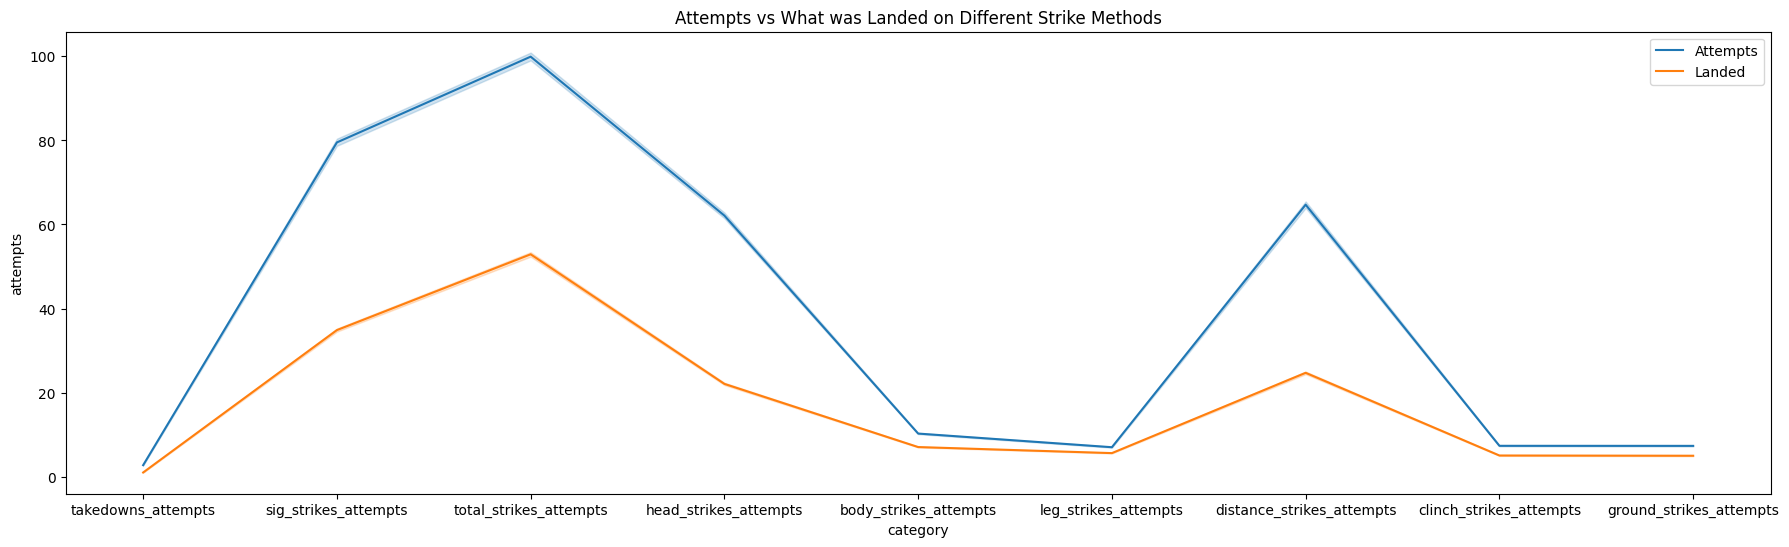

In [14]:
attempts_list = ['takedowns_attempts', 'sig_strikes_attempts', 'total_strikes_attempts', 'head_strikes_attempts', 'body_strikes_attempts', 'leg_strikes_attempts', 'distance_strikes_attempts','clinch_strikes_attempts','ground_strikes_attempts']
landed_list = ['takedowns_landed', 'sig_strikes_landed', 'total_strikes_landed', 'head_strikes_landed', 'body_strikes_landed', 'leg_strikes_landed', 'distance_strikes_landed','clinch_strikes_landed','ground_strikes_landed']

attempts_data = master_dataframe_b[attempts_list].melt(var_name='category', value_name='attempts')
landed_data = master_dataframe_b[landed_list].melt(var_name='category', value_name='landed')

df_attempts_vs_landed = pd.concat([attempts_data, landed_data['landed']])

plt.figure(figsize=(22, 6))
sns.lineplot(data=df_attempts_vs_landed, x='category', y='attempts', label='Attempts')
sns.lineplot(data=df_attempts_vs_landed, x='category', y='landed', label='Landed')
plt.title('Attempts vs What was Landed on Different Strike Methods')

plt.show()

In the above graph, we can see that there are significant attempts for head strikes as well as significant strikes and distance strikes. While distance strikes might not be very important in this context, the head strikes and sig strikes are very important in terms of injuries. 

Text(0.5, 1.0, 'Injured Fighters vs Their Age Throughout Each of Their Matches')

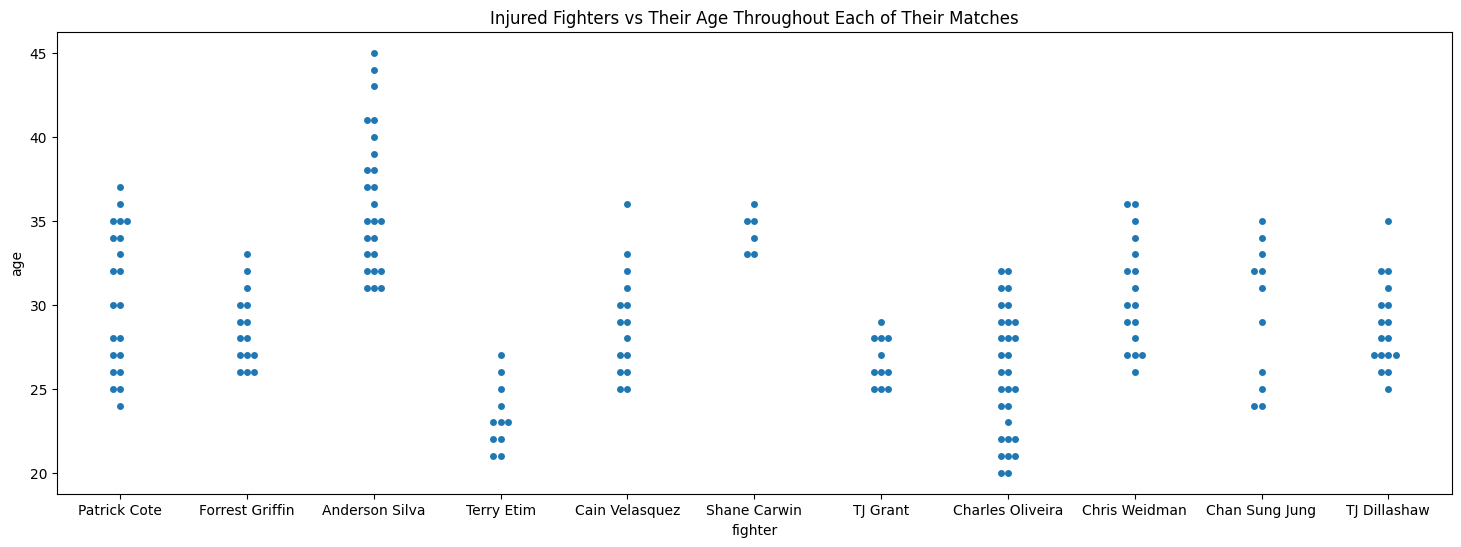

In [15]:
fighter_injured_list = ['Patrick Cote','Forrest Griffin','Anderson Silva','Terry Etim','Cain Velasquez','Shane Carwin','TJ Grant','Charles Oliveira','Chris Weidman', 'Chan Sung Jung','TJ Dillashaw']
db_injured_fighters = master_dataframe_b[master_dataframe_b['fighter'].isin(fighter_injured_list)]

plt.figure(figsize=(18, 6))
sns.swarmplot(data=db_injured_fighters, x='fighter', y='age')
plt.title('Injured Fighters vs Their Age Throughout Each of Their Matches')


In the above graph we can see what ages the fighters started competing in MMA matches. This graph can help us visualize the career times of the fighters, and shows us gaps in between where they might have been injured for longer in between their matches. These fighters have an average of around 10 career years which is not that much, and they all suffered injuries that ultimately took them out of the sport.

Text(0.5, 1.0, 'Injured Fighters vs The Time Difference in Their Matches')

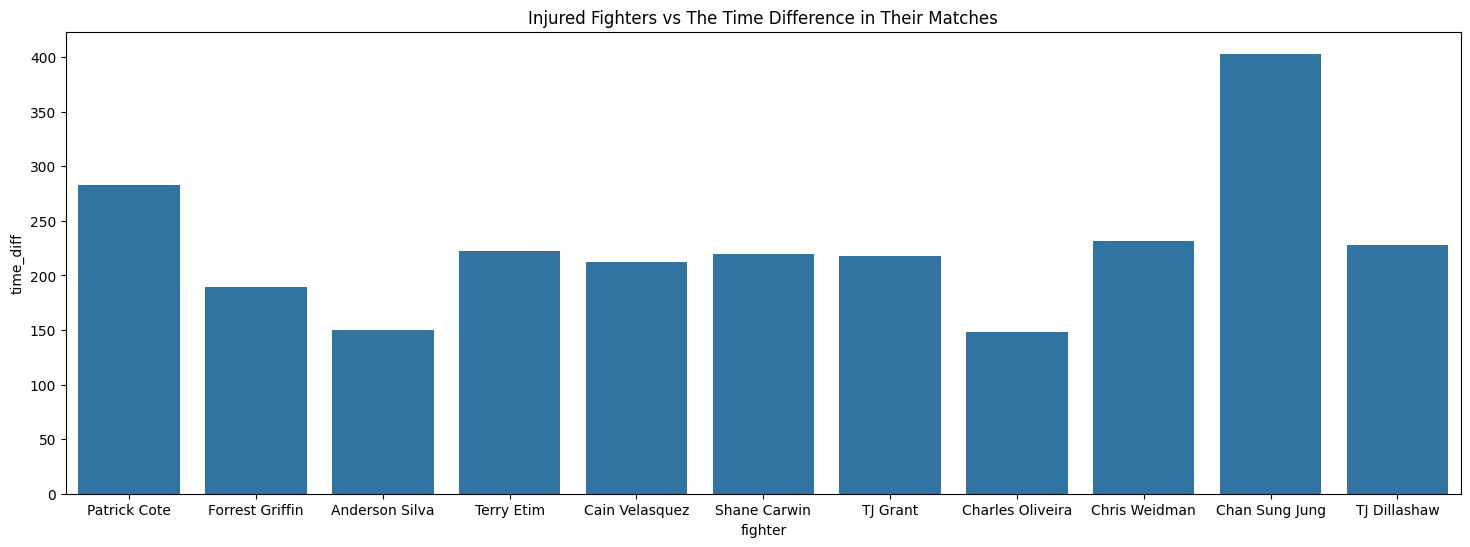

In [16]:
fighter_times = pd.DataFrame({
    'fighter': fighter_injured_list,
    'time_diff': [td.total_seconds() / (60 * 60 * 24) for td in date_diffs]
})
plt.figure(figsize=(18, 6))
sns.barplot(data=fighter_times, x="fighter", y = "time_diff")
plt.title('Injured Fighters vs The Time Difference in Their Matches')

In the graph above we can see the average time in between each of the fighters matches. Some have way longer times in between matches for suffering injuries then getting back into the sport, but on average we see a trend of around 225 days in between matches. Time in between matches is usually determined by a referee or someone in medical personell to gage how long the fighter will need to rest for in order to get better from injuries suffered during the last match. 